
# Baseline

### Import the necessary libraries

In [1]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import mimetypes
import seaborn as sns 

# Sklearn libraries
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, auc
from sklearn.base import BaseEstimator, TransformerMixin # to create classes
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.impute import (SimpleImputer)
from sklearn.preprocessing import (OneHotEncoder, OrdinalEncoder, StandardScaler)
from matplotlib.colors import ListedColormap
from matplotlib import transforms
import zlib, json, base64
import requests
import datetime
import matplotlib.ticker as mtick


In [2]:
data1 = np.random.random((4, 4))
cmap = plt.cm.Pastel2
my_cmap = cmap(np.arange(cmap.N))
my_cmap[:, -1] = np.linspace(0.5, 0.7, cmap.N)
my_cmap = ListedColormap(my_cmap)

In [3]:
data1 = np.random.random((4, 4))
cmap = plt.cm.Paired
gcmap = cmap(np.arange(cmap.N))
gcmap[:, -1] = np.linspace(0.6, 0.7, cmap.N)
gcmap = ListedColormap(gcmap)

#### Import the dataset

In [4]:
df_train = pd.read_csv('data/train.csv', 
                       index_col='observation_id',
                       header = 0,
                       names = ['observation_id', 
                                'type', 
                                'date', 
                                'policing_operation',
                                'lat',
                                'long',
                                'sex',
                                'age',
                                'self_ethnicity',
                                'officer_ethnicity',
                                'legislation',
                                'object_search',
                                'outcome',
                                'linked_search',
                                'stripped',
                                'station'])

In [5]:
df_train.head(5)

,type,date,policing_operation,lat,long,sex,age,self_ethnicity,officer_ethnicity,legislation,object_search,outcome,linked_search,stripped,station
observation_id,,,,,,,,,,,,,,,
2e4d0094-c30b-471b-a211-72a9790feca2,Person search,2020-12-01T01:10:00+00:00,NaN,50.798824,-1.089471,Male,25-34,Other ethnic group - Not stated,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,Community resolution,False,False,hampshire
4779fbe8-6e05-4534-85fd-db32952ee309,Person search,2020-12-01T02:00:00+00:00,NaN,50.785099,-1.091540,Male,over 34,White - Any other White background,Other,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False,hampshire
cb5c685d-acac-42e2-914d-75e6ff73b0a8,Person search,2020-12-01T09:15:00+00:00,NaN,50.952006,-1.403341,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,True,hampshire
f486e116-5b1e-45db-9931-a7f070c5c478,Person search,2020-12-01T10:20:00+00:00,NaN,50.806383,-1.079844,Male,10-17,Other ethnic group - Not stated,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,False,False,hampshire
78f4020e-12cc-4889-bf1a-2f2c29b2f662,Person search,2020-12-01T10:24:00+00:00,NaN,50.806670,-1.081982,Male,10-17,Other ethnic group - Not stated,Asian,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,False,False,hampshire


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 856610 entries, 2e4d0094-c30b-471b-a211-72a9790feca2 to a697ebdf-0ff2-4d6e-8c0e-1e6285858301
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   type                856610 non-null  object 
 1   date                856610 non-null  object 
 2   policing_operation  646620 non-null  object 
 3   lat                 700308 non-null  float64
 4   long                700308 non-null  float64
 5   sex                 856610 non-null  object 
 6   age                 856610 non-null  object 
 7   self_ethnicity      841427 non-null  object 
 8   officer_ethnicity   856610 non-null  object 
 9   legislation         816863 non-null  object 
 10  object_search       856610 non-null  object 
 11  outcome             856610 non-null  object 
 12  linked_search       254683 non-null  object 
 13  stripped            340097 non-null  object 
 14  station             8566

### EDA (Exploratory Dataset Analysis)

In [7]:
df_train.nunique()

type                       3
date                  410791
policing_operation         2
lat                   125553
long                  127197
sex                        3
age                        5
self_ethnicity            19
officer_ethnicity          5
legislation               19
object_search             17
outcome                    7
linked_search              2
stripped                   2
station                   41
dtype: int64

In [8]:
attributes = ['type',
              'policing_operation',
              'sex', 
              'age', 
              'self_ethnicity', 
              'officer_ethnicity', 
              'legislation', 
              'object_search', 
              'outcome', 
              'linked_search',
              'stripped',
              'station']

for col in attributes:
    print(df_train[col].unique())

['Person search' 'Person and Vehicle search' 'Vehicle search']
[nan False True]
['Male' 'Female' 'Other']
['25-34' 'over 34' '10-17' '18-24' 'under 10']
['Other ethnic group - Not stated' 'White - Any other White background'
 'White - English/Welsh/Scottish/Northern Irish/British'
 'Mixed/Multiple ethnic groups - White and Black African'
 'Black/African/Caribbean/Black British - Any other Black/African/Caribbean background'
 'Black/African/Caribbean/Black British - Caribbean'
 'Asian/Asian British - Any other Asian background'
 'Asian/Asian British - Indian' 'Asian/Asian British - Bangladeshi'
 'Black/African/Caribbean/Black British - African' 'White - Irish'
 'Other ethnic group - Any other ethnic group'
 'Mixed/Multiple ethnic groups - White and Asian'
 'Asian/Asian British - Chinese'
 'Mixed/Multiple ethnic groups - Any other Mixed/Multiple ethnic background'
 'Mixed/Multiple ethnic groups - White and Black Caribbean'
 'Asian/Asian British - Pakistani' 'White - Gypsy or Irish Travel

In [9]:
df_train.isna().sum()

type                       0
date                       0
policing_operation    209990
lat                   156302
long                  156302
sex                        0
age                        0
self_ethnicity         15183
officer_ethnicity          0
legislation            39747
object_search              0
outcome                    0
linked_search         601927
stripped              516513
station                    0
dtype: int64

In [10]:
df_train['policing_operation'].unique()

array([nan, False, True], dtype=object)

In [11]:
df_train['date'].min()

'2020-02-01T00:00:00+00:00'

In [12]:
df_train['date'].max()

'2021-12-31T23:59:00+00:00'

#### Convert Data Types

In [13]:
# Convert Column Date to Datetime

df_train['date'] = pd.to_datetime(df_train['date'])
df_train = df_train.sort_values('date')

In [14]:
# Linked_search should be considered to False
# It was found that officers tend to forget to fill in a None when they don’t find anything. 

df_train[['policing_operation',
          'linked_search']] = df_train[['policing_operation', 
                                   'linked_search']].fillna(False).astype('boolean')

In [15]:
# Stripped should be filled with False
# Except when it is Vehicle search, in which case it makes no sense and should be kept as NaN
# Otherwise should be considered as a data imputation error

mask= ((df_train['type'] != 'Vehicle search') & 
      (df_train['stripped'].isna()))

df_train.loc[mask, 'stripped'] = False

In [16]:
# Convert Columns with Category Values

cat = ['type', 
       'policing_operation',
       'sex',
       'age', 
       'self_ethnicity', 
       'officer_ethnicity', 
       'legislation', 
       'object_search',
       'outcome', 
       'station']

df_train[cat] = df_train[cat].astype('category')

### Define Target

In [17]:
positive_outcome = ['Community resolution',
                    'Khat or Cannabis warning',
                    'Caution (simple or conditional)',
                    'Arrest',
                    'Penalty Notice for Disorder',
                    'Summons / charged by post',
                    'Suspect arrested',
                    'Suspect summoned to court']


df_train['positive_outcome'] = [oc in positive_outcome for oc in df_train['outcome']]

In [18]:
df_train['target'] = df_train['positive_outcome'] & df_train['linked_search']

### EDA

In [19]:
df_train.isna().sum()

type                       0
date                       0
policing_operation         0
lat                   156302
long                  156302
sex                        0
age                        0
self_ethnicity         15183
officer_ethnicity          0
legislation            39747
object_search              0
outcome                    0
linked_search              0
stripped                 993
station                    0
positive_outcome           0
target                     0
dtype: int64

In [20]:
df_train.groupby(df_train.station)[['sex']].value_counts().unstack()

sex,Female,Male,Other
station,,,
avon-and-somerset,1927,11262,0
bedfordshire,588,5316,0
btp,1370,17180,7
cambridgeshire,354,3013,0
cheshire,845,7426,0
city-of-london,417,4122,0
cleveland,914,6993,0
cumbria,442,2559,21
derbyshire,347,3071,1


In [21]:
df_train.groupby(df_train.station)[['age']].value_counts().unstack()

age,10-17,18-24,25-34,over 34,under 10
station,,,,,
avon-and-somerset,2272,4019,3397,3484,17
bedfordshire,1101,2216,1361,1223,3
btp,4388,6718,4168,3238,45
cambridgeshire,806,1179,715,661,6
cheshire,1377,2606,2023,2265,0
city-of-london,354,1693,1479,1009,4
cleveland,934,1638,2262,3071,2
cumbria,555,753,788,921,5
derbyshire,693,1089,830,806,1


In [22]:
df_train.groupby(df_train.station)[['officer_ethnicity']].value_counts().unstack()

officer_ethnicity,Asian,Black,Mixed,Other,White
station,,,,,
avon-and-somerset,462,1534,700,148,10345
bedfordshire,1728,992,0,84,3100
btp,1446,4844,0,647,11620
cambridgeshire,429,329,0,85,2524
cheshire,193,273,0,55,7750
city-of-london,928,1070,0,337,2204
cleveland,371,181,0,107,7248
cumbria,73,45,0,33,2871
derbyshire,433,315,0,134,2537


In [23]:
df_train.groupby(df_train.station)[['type']].value_counts().unstack()

type,Person and Vehicle search,Person search,Vehicle search
station,,,
avon-and-somerset,4152,9037,0
bedfordshire,1406,4498,0
btp,227,18301,29
cambridgeshire,570,2797,0
cheshire,1685,6586,0
city-of-london,1195,3344,0
cleveland,581,7304,22
cumbria,338,2681,3
derbyshire,709,2710,0


In [24]:
df_train.groupby(df_train.station)[['linked_search']].value_counts().unstack()

linked_search,False,True
station,,
avon-and-somerset,9443,3746
bedfordshire,4631,1273
btp,11581,6976
cambridgeshire,2308,1059
cheshire,6331,1940
city-of-london,2976,1563
cleveland,6606,1301
cumbria,1481,1541
derbyshire,311,3108


In [25]:
df_train.groupby(['positive_outcome','linked_search', 'target']).size()

positive_outcome  linked_search  target
False             False          False     582321
                  True           False      45153
True              False          False     158729
                  True           True       70407
dtype: int64

In [26]:
df_train.groupby(df_train.station)[['target']].value_counts().unstack()

target,False,True
station,,
avon-and-somerset,10186,3003
bedfordshire,4646,1258
btp,15135,3422
cambridgeshire,2566,801
cheshire,6331,1940
city-of-london,3395,1144
cleveland,6761,1146
cumbria,2379,643
derbyshire,2733,686


#### Time analysis

In [27]:
df_search_counts = df_train[['date','officer_ethnicity']].reset_index().groupby(['date','officer_ethnicity']).count().unstack()

In [28]:
df_search_counts.tail()

observation_id                        
officer_ethnicity                  Asian Black Mixed Other White
date                                                            
2021-12-31 23:52:00+00:00              0     0     0     1     2
2021-12-31 23:53:00+00:00              0     0     0     0     1
2021-12-31 23:55:00+00:00              1     1     0     0     1
2021-12-31 23:56:00+00:00              0     1     0     0     2
2021-12-31 23:59:00+00:00              0     1     0     0     0

In [29]:
df_A = df_search_counts.iloc[:,0].resample('W').sum()

In [30]:
df_B = df_search_counts.iloc[:,1].resample('W').sum()

In [31]:
df_M = df_search_counts.iloc[:,2].resample('W').sum()

In [32]:
df_O = df_search_counts.iloc[:,3].resample('W').sum()

In [33]:
df_W = df_search_counts.iloc[:,4].resample('W').sum()

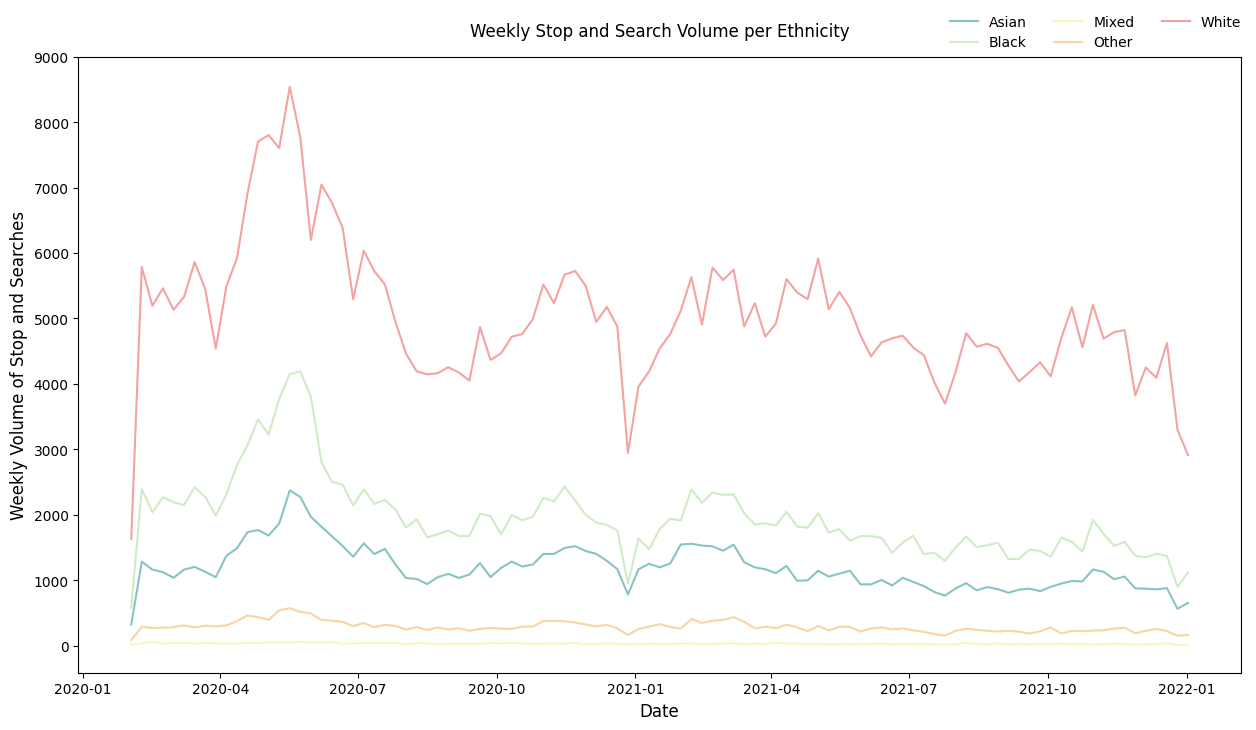

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
ax.set_title('Weekly Stop and Search Volume per Ethnicity', pad = 15)

ax = sns.lineplot(data = df_A, label = 'Asian', color = '#89C4C2')
ax = sns.lineplot(data = df_B, label = 'Black', color = '#D0EBC5')
ax = sns.lineplot(data = df_M, label = 'Mixed', color = '#F3F7C1')
ax = sns.lineplot(data = df_O, label = 'Other', color = '#F9D4A4')
ax = sns.lineplot(data = df_W, label = 'White', color = '#F5A2A2')

ax.legend(loc='upper left')
ax.set_ylabel('Weekly Volume of Stop and Searches', fontsize=12)
ax.set_xlabel('Date', fontsize = 12)
ax.set_yticks([0,1000,2000,3000,4000,5000,6000,7000,8000, 9000])
ax.legend(ncol = 3, loc='center', bbox_to_anchor=(0.875, 1.04), frameon=False)

In [35]:
df_search_counts = df_train[['date','sex']].reset_index().groupby(['date','sex']).count().unstack()

In [36]:
df_search_counts.tail()

observation_id           
sex                               Female Male Other
date                                               
2021-12-31 23:52:00+00:00              1    2     0
2021-12-31 23:53:00+00:00              0    1     0
2021-12-31 23:55:00+00:00              0    3     0
2021-12-31 23:56:00+00:00              0    3     0
2021-12-31 23:59:00+00:00              0    1     0

In [37]:
df_F = df_search_counts.iloc[:,0].resample('W').sum()

In [38]:
df_M = df_search_counts.iloc[:,1].resample('W').sum()

In [39]:
df_O = df_search_counts.iloc[:,2].resample('W').sum()

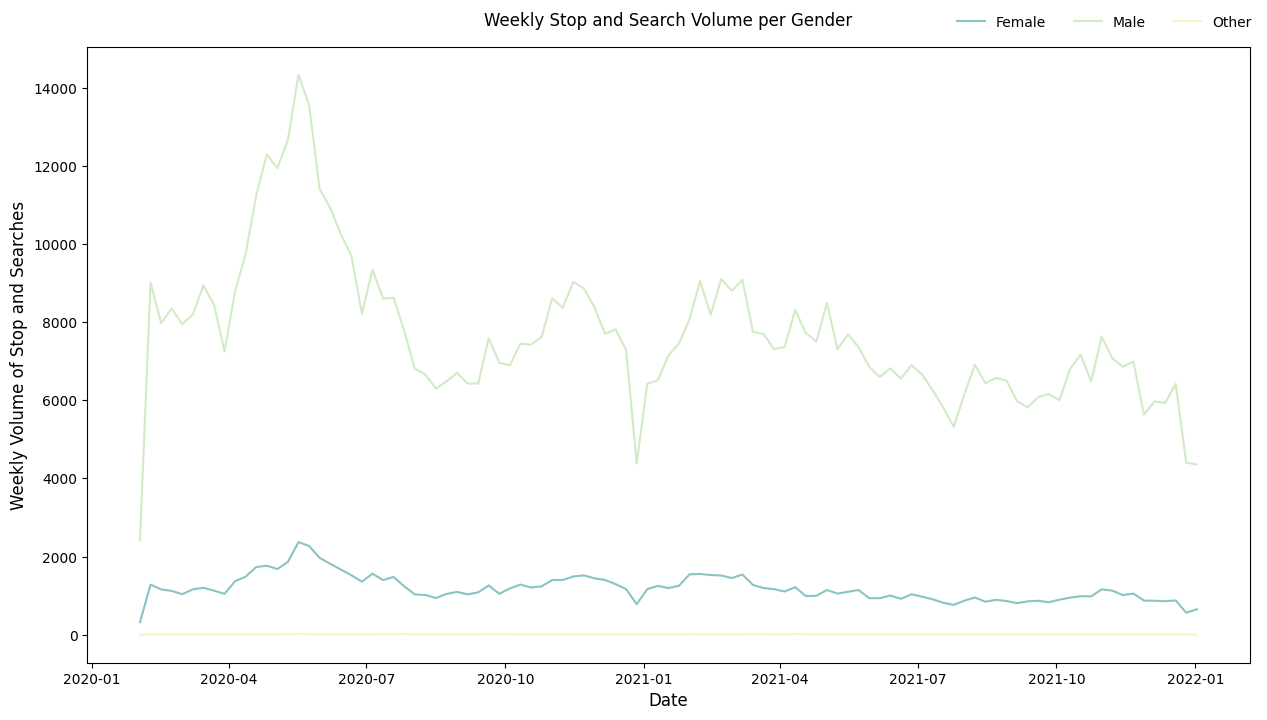

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
ax.set_title('Weekly Stop and Search Volume per Gender', pad = 15)

ax = sns.lineplot(data = df_A, label = 'Female', color = '#89C4C2')
ax = sns.lineplot(data = df_M, label = 'Male', color = '#D0EBC5')
ax = sns.lineplot(data = df_O, label = 'Other', color = '#F3F7C1')

ax.legend(loc='upper left')
ax.set_ylabel('Weekly Volume of Stop and Searches', fontsize = 12)
ax.set_xlabel('Date', fontsize = 12)
ax.legend(ncol = 3, loc='center', bbox_to_anchor=(0.875, 1.04), frameon=False)

#### Relevant Attributes Distribution

In [41]:
df_age = df_train.groupby(df_train.age).size()/df_train.shape[0]*100

In [42]:
df_sex = df_train.groupby(df_train.sex).size()/df_train.shape[0]*100

In [43]:
df_oe = df_train.groupby(df_train.officer_ethnicity).size()/df_train.shape[0]*100

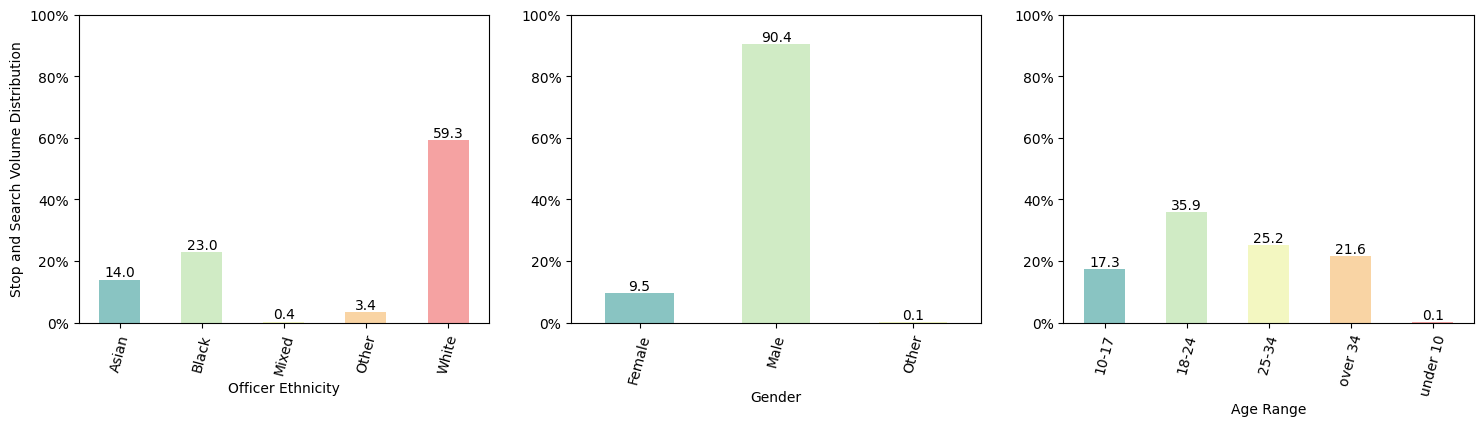

In [44]:
color_list = ['#89C4C2','#D0EBC5', '#F3F7C1', '#F9D4A4', '#F5A2A2', '#BC789E']
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(18, 4))

ax = df_oe.plot(kind = 'bar', stacked = True, color=color_list, ax = axes[0])
ax.set_ylabel('Stop and Search Volume Distribution')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=None))
ax.tick_params(axis='x', labelrotation = 75)
ax.set_xlabel('Officer Ethnicity')
ax.set_ylim(0,100)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 1,round(height,1) ,ha="center")

ax = df_sex.plot(kind = 'bar', stacked = True, color=color_list, ax = axes[1])
ax.tick_params(axis='x', labelrotation = 75)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=None))
ax.set_xlabel('Gender')
ax.set_ylim(0,100)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 1,round(height,1) ,ha="center") 
    
ax = df_age.plot(kind = 'bar', stacked = True,  color=color_list)
ax.tick_params(axis='x', labelrotation = 75)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=None))
ax.set_xlabel('Age Range')
ax.set_ylim(0,100)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 1,round(height,1) ,ha="center")
    

In [45]:
df_train[df_train['age'] == 'under 10'].groupby(df_train.station)['station'].head()

observation_id
7e31cfa9-fdfb-4b64-b2ce-48ce8ec5946d            norfolk
f8c29885-110f-4903-82ec-5ba8f6ae29ab       metropolitan
b6520fc8-1db8-4778-a724-1b7ec7b28454       lincolnshire
840560e1-5544-4119-b39f-a63485c0fa3b                btp
16ebc134-6d9d-4514-ab69-fb3875737157    nottinghamshire
                                             ...       
9c9d3e14-2109-4900-8db6-7779e87f770f    gloucestershire
bfe9156a-a84a-4d6d-892a-17c74b2010e1    gloucestershire
4c9b5763-22f6-484d-bf44-30ace634c1bd        west-mercia
23b5da44-7aa8-424d-9b11-ca9c75043caa        west-mercia
cd699afb-270c-49b6-81c1-19c818202261     cambridgeshire
Name: station, Length: 143, dtype: category
Categories (41, object): ['avon-and-somerset', 'bedfordshire', 'btp', 'cambridgeshire', ..., 'west-mercia', 'west-midlands', 'west-yorkshire', 'wiltshire']

#### Stop and Searches Distribution per Sex and Station

In [46]:
df_plot = df_train.groupby(df_train.station)['sex'].value_counts(normalize=True, sort=False).unstack()*100

#Set categories
df_plot.columns = pd.CategoricalIndex(df_plot.columns.values, ordered=True, categories=['Male','Female','Other'])

#Sort the data
df_plot = df_plot.sort_index(axis=1)

In [47]:
df_plot

,Male,Female,Other
station,,,
avon-and-somerset,85.389340,14.610660,0.000000
bedfordshire,90.040650,9.959350,0.000000
btp,92.579620,7.382659,0.037722
cambridgeshire,89.486189,10.513811,0.000000
cheshire,89.783581,10.216419,0.000000
city-of-london,90.812954,9.187046,0.000000
cleveland,88.440622,11.559378,0.000000
cumbria,84.679021,14.626075,0.694904
derbyshire,89.821585,10.149166,0.029248


In [48]:
mean_search_male = df_plot['Male'].mean()

Text(0.5, 0, 'Police Station')

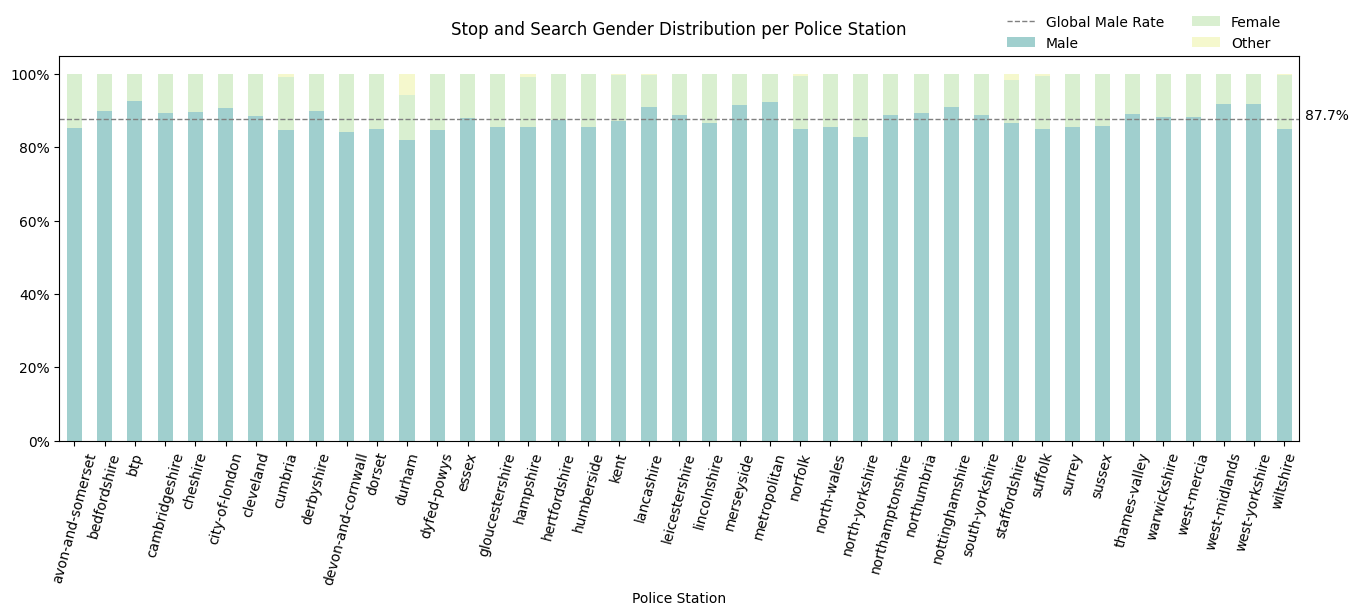

In [49]:
ax = df_plot.plot(kind = 'bar', stacked = True, color = color_list, figsize=(16, 5), alpha = 0.8)
ax.axhline(y= mean_search_male, color = 'grey', linewidth = 1, linestyle = '--', label ='Global Male Rate')
ax.text(41.4, mean_search_male, "{}%".format(round(mean_search_male, 1)) ,ha="center")
ax.set_title('Stop and Search Gender Distribution per Police Station', pad=15)
ax.tick_params(axis='x', labelrotation = 75)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=None))
ax.legend(ncol = 2, loc='center', bbox_to_anchor=(0.875, 1.06), frameon=False)
ax.set_xlabel('Police Station')

#### Stop and Searches Distribution per Etchnicity and Station

In [50]:
df_plot = df_train.groupby(df_train.station)['officer_ethnicity'].value_counts(normalize=True).unstack()*100

#Set categories
df_plot.columns = pd.CategoricalIndex(df_plot.columns.values, ordered=True, categories=['White','Asian','Black', 'Mixed', 'Other'])

#Sort the data
df_plot = df_plot.sort_index(axis=1)

In [51]:
mean_search_white = df_plot['White'].mean()

Text(0.5, 0, 'Police Station')

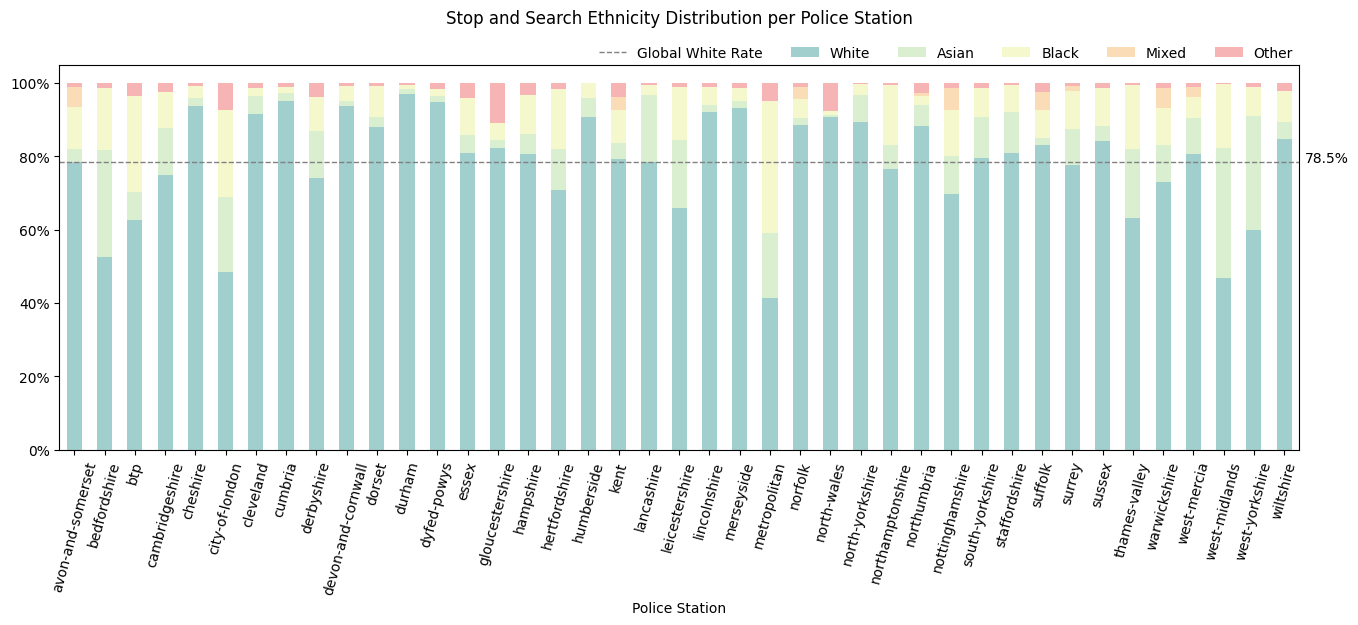

In [52]:
ax = df_plot.plot(kind = 'bar', stacked = True, color = color_list, figsize=(16, 5), alpha = 0.8)
ax.axhline(y= mean_search_white, color = 'grey', linewidth = 1, linestyle = '--', label = 'Global White Rate')
ax.text(41.4, mean_search_white, "{}%".format(round(mean_search_white, 1)) ,ha="center")
ax.set_title('Stop and Search Ethnicity Distribution per Police Station', pad = 30)
ax.tick_params(axis='x', labelrotation = 75)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=None))
ax.legend(ncol = 6, loc='center', bbox_to_anchor=(0.715, 1.03), frameon=False)
ax.set_xlabel('Police Station')

#### Stop and Searches Distribution per Age and Station

In [53]:
df_train['age'] = df_train['age'].apply(lambda x: 'under 18' if x == 'under 10' or x == '10-17' else x)
df_plot = df_train.groupby(df_train.station)['age'].value_counts(normalize=True).unstack()*100

#Set categories
df_plot.columns = pd.CategoricalIndex(df_plot.columns.values, ordered=True, categories=['under 18','18-24', '25-34', 'over 34'])

#Sort the data
df_plot = df_plot.sort_index(axis=1)

In [54]:
mean_search_minor = df_plot['under 18'].mean()

In [55]:
print(df_train[df_train['age'] == 'under 18'].groupby(df_train.station).size().sort_values(ascending = False)[:15])

station
metropolitan         73448
merseyside            5945
thames-valley         5621
west-yorkshire        4597
hampshire             4497
btp                   4433
south-yorkshire       3861
kent                  3193
lancashire            2957
hertfordshire         2581
essex                 2547
sussex                2543
surrey                2321
avon-and-somerset     2289
humberside            2066
dtype: int64


In [56]:
print(df_train.groupby(df_train.station)['age'].value_counts(normalize=True).unstack()['under 18'].sort_values(ascending = False)[:10])

station
cambridgeshire     0.241164
btp                0.238886
sussex             0.223501
hampshire          0.222294
wiltshire          0.219393
west-midlands      0.215511
surrey             0.215426
gloucestershire    0.215415
derbyshire         0.202983
humberside         0.200466
Name: under 18, dtype: float64


Text(0.5, 0, 'Police Station')

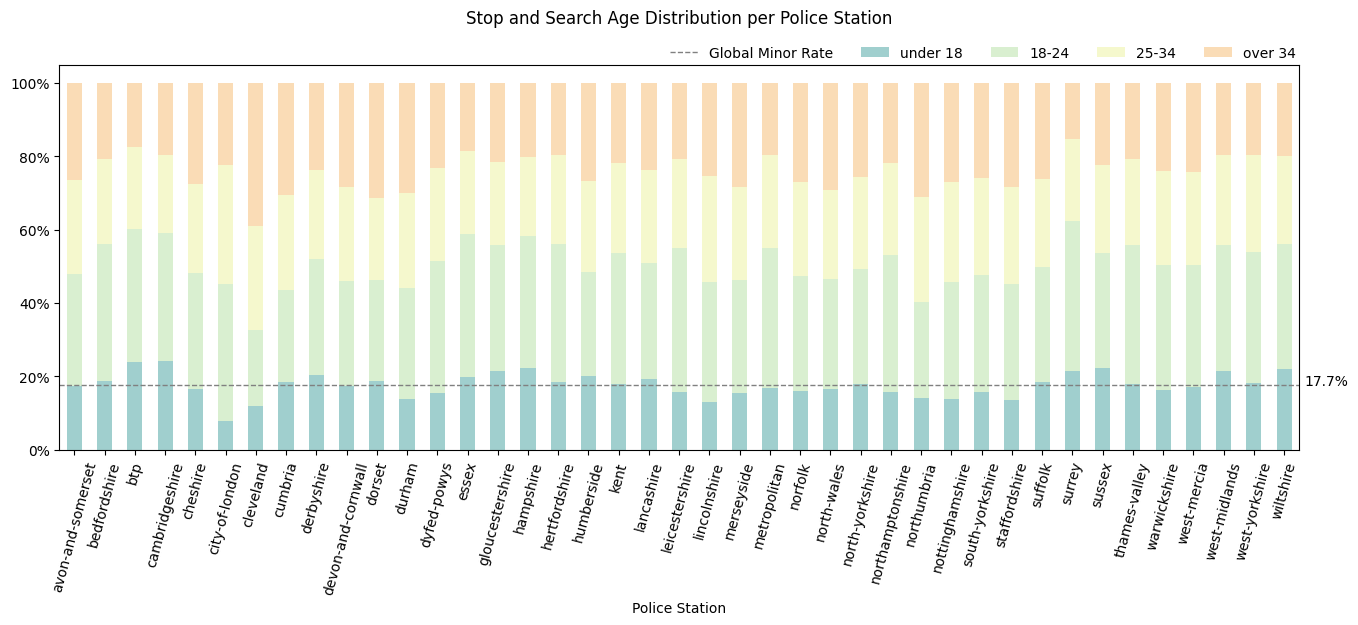

In [57]:
ax = df_plot.plot(kind = 'bar', stacked = True, color = color_list, figsize=(16, 5),  alpha = 0.8)
ax.axhline(y= mean_search_minor, color = 'grey', linewidth = 1, linestyle = '--', label = 'Global Minor Rate')
ax.text(41.4, mean_search_minor, "{}%".format(round(mean_search_minor, 1)) ,ha="center")
ax.set_title('Stop and Search Age Distribution per Police Station', pad=30)
ax.tick_params(axis='x', labelrotation = 75)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=None))
ax.legend(ncol = 5, loc='center', bbox_to_anchor=(0.745, 1.03), frameon=False)
ax.set_xlabel('Police Station')

#### Stripped Distribution Station

In [58]:
df_plot = df_train.groupby(df_train.station)['stripped'].value_counts(normalize=True).unstack()

In [59]:
mean_stripped = df_plot.value_counts().mean()

In [60]:
1-mean_stripped

0.0

(0.6, 1.0)

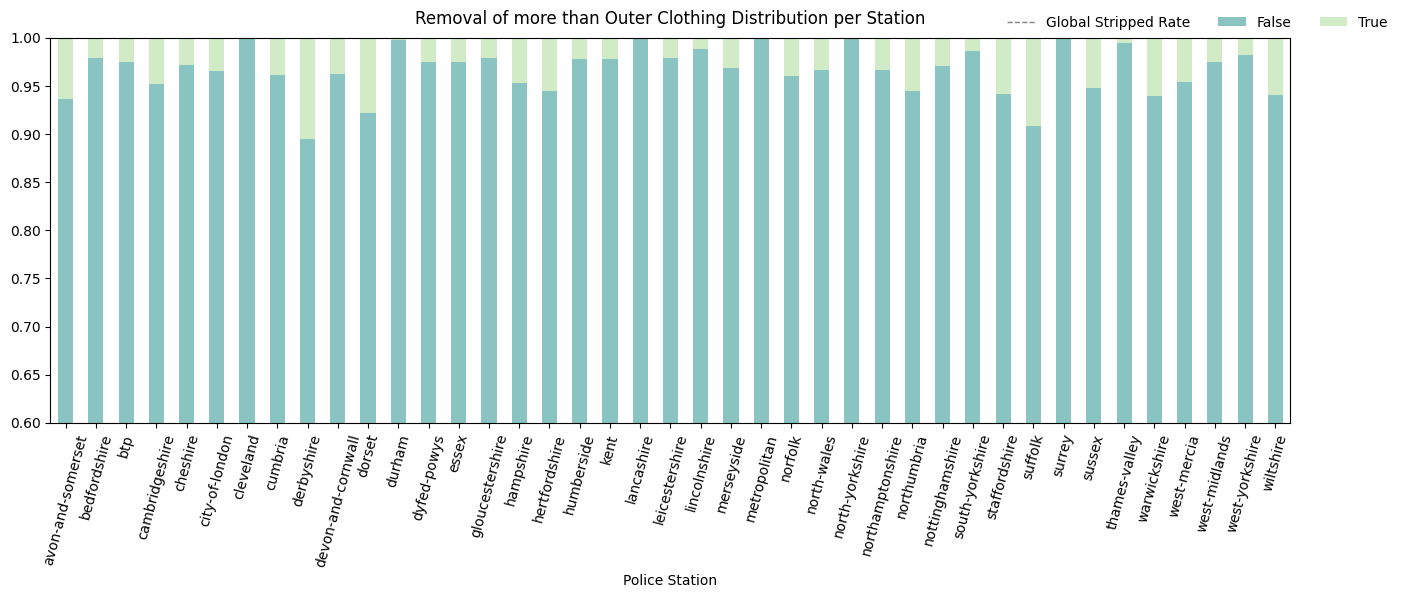

In [61]:
ax = df_plot.plot(kind = 'bar', stacked = True, color = color_list, figsize=(16, 5))
ax.axhline(y= 1-mean_stripped, color = 'grey', linewidth = 1, linestyle = '--', label ='Global Stripped Rate')
ax.set_title('Removal of more than Outer Clothing Distribution per Station', pad=10)
ax.tick_params(axis='x', labelrotation = 75)
ax.legend(ncol = 3, loc='center', bbox_to_anchor=(0.925, 1.04), frameon=False)
ax.set_xlabel('Police Station')
ax.set_ylim(0.6, 1)

#### Mean Stripped and Target Distribution Per Ethnicity

In [62]:
df_filter = df_train[~df_train['station'].isin(['metropolitan', 'lancashire', 'humberside', 'leicestershire'])]

In [63]:
df_filter.shape

(385885, 17)

In [64]:
df_plot = df_filter.groupby(df_filter.officer_ethnicity)[['target', 'stripped']].agg(['mean'])*100

In [65]:
df_filter.groupby(df_filter.officer_ethnicity).size()/df_filter.shape[0]*100

officer_ethnicity
Asian     9.661946
Black     9.789704
Mixed     0.784171
Other     1.879316
White    77.884862
dtype: float64

In [66]:
mean_success = df_filter['target'].agg(['mean'])['mean']*100

In [67]:
mean_stripped = df_filter['stripped'].agg(['mean'])['mean']*100

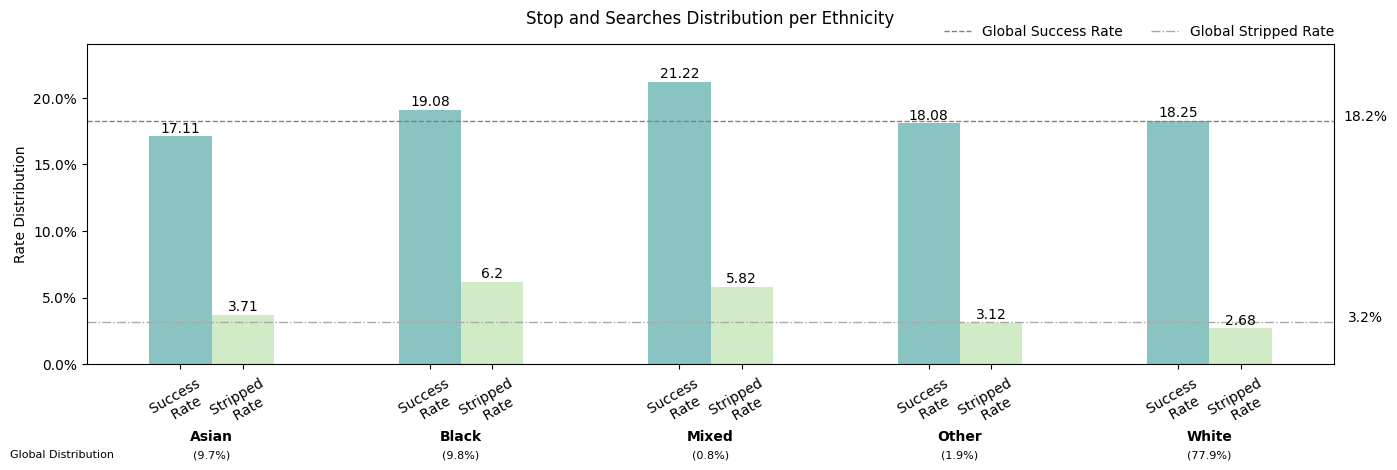

In [68]:
sex = ['Success \n Rate', 'Stripped \n Rate']
labels = ['Asian', 'Black', 'Mixed', 'Other', 'White']
global_distribution = ['(9.7%)', '(9.8%)', '(0.8%)', '(1.9%)', '(77.9%)']

ax = df_plot.plot(kind = 'bar', color = color_list, figsize=(14, 5))
ax.set_title('Stop and Searches Distribution per Ethnicity', pad=15)
sex_pos = np.sort( [p.get_x() + p.get_width()/2  for p in ax.patches])

ax.axhline(y= mean_success, color = 'grey', linewidth = 1, linestyle = '--', label = 'Global Success Rate')
ax.axhline(y= mean_stripped, color = 'darkgrey', linewidth = 1, linestyle = '-.', label = 'Global Stripped Rate')
ax.text(4.625, mean_success, "{}%".format(round(mean_success, 1)) ,ha="center")
ax.text(4.625, mean_stripped, "{}%".format(round(mean_stripped, 1)) ,ha="center")

ax.set_xticks(sex_pos)
ax.set_xticklabels(np.tile(sex, len(labels)), rotation=30)

ax.legend(['Global Success Rate', 'Global Stripped Rate'], ncol = 2, bbox_to_anchor=(1.01, 1.1), frameon=False)
#ax.get_legend().remove()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=None))

ax.set_xlabel('') # remove default xlabel
fruit_pos = sex_pos.reshape(-1, len(sex)).mean(axis=1)
trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)

for pos, label, gd in zip(fruit_pos, labels, global_distribution):
    ax.text(pos, -0.25,  label, transform=trans, ha='center', va='bottom', color='black', fontsize=10, weight = 'bold')
    ax.text(pos, -0.3,  gd, transform=trans, ha='center', va='bottom', color='black', fontsize=8)
    
ax.text(-0.6, -0.3,  'Global Distribution', transform=trans, ha='center', va='bottom', color='black', fontsize=8)

#for pos in (fruit_pos[:-1] + fruit_pos[1:]) / 2:
#    ax.axvline(pos, 0, -0.18, color='gray', ls='--' , clip_on=False)
ax.set_ylim(0,24)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.3,round(height,2) ,ha="center")
plt.ylabel("Rate Distribution");    

plt.tight_layout()
plt.show()

#### Mean Stripped and Target Distribution Per Gender

In [69]:
df_plot = df_filter.groupby(df_filter.sex)[['target', 'stripped']].agg(['mean'])*100

In [70]:
df_filter.groupby(df_filter.sex).size()/df_filter.shape[0]*100

sex
Female    11.459891
Male      88.366741
Other      0.173368
dtype: float64

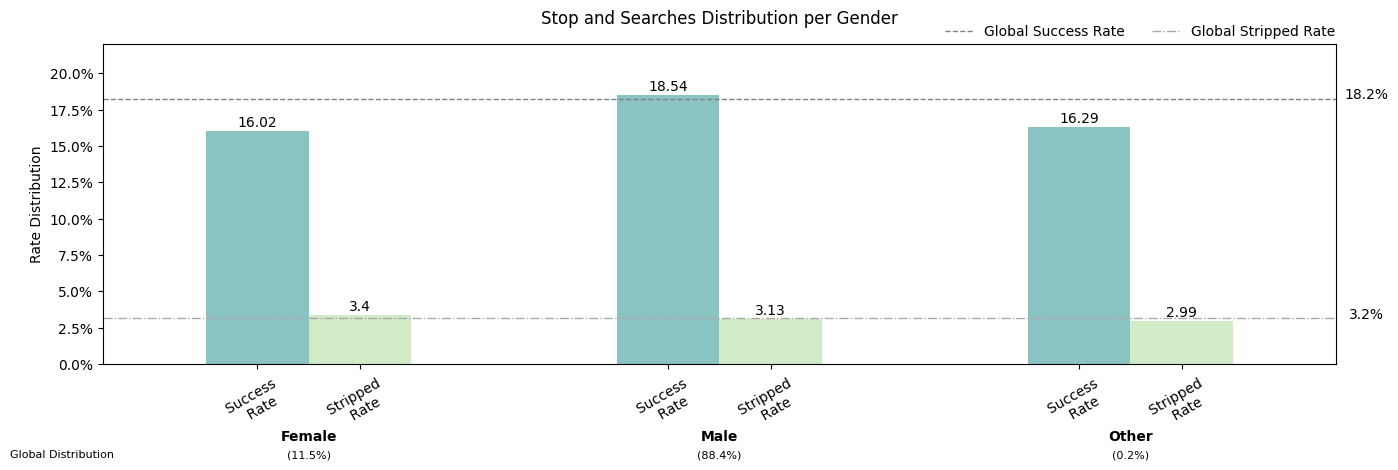

In [71]:
sex = ['Success \n Rate', 'Stripped \n Rate']
labels = ['Female', 'Male', 'Other']
global_distribution = ['(11.5%)', '(88.4%)', '(0.2%)']

ax = df_plot.plot(kind = 'bar', color = color_list, figsize=(14, 5))
ax.set_title('Stop and Searches Distribution per Gender', pad=15)
sex_pos = np.sort( [p.get_x() + p.get_width()/2  for p in ax.patches])

ax.axhline(y= mean_success, color = 'grey', linewidth = 1, linestyle = '--', label = 'Global Success Rate')
ax.axhline(y= mean_stripped, color = 'darkgrey', linewidth = 1, linestyle = '-.', label = 'Global Stripped Rate')
ax.text(2.575, mean_success, "{}%".format(round(mean_success, 1)) ,ha="center")
ax.text(2.575, mean_stripped, "{}%".format(round(mean_stripped, 1)) ,ha="center")

ax.set_xticks(sex_pos)
ax.set_xticklabels(np.tile(sex, len(labels)), rotation=30)

ax.legend(['Global Success Rate', 'Global Stripped Rate'], ncol = 2, bbox_to_anchor=(1.01, 1.1), frameon=False)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=None))
ax.set_xlabel('') # remove default xlabel
fruit_pos = sex_pos.reshape(-1, len(sex)).mean(axis=1)
trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)

for pos, label, gd in zip(fruit_pos, labels, global_distribution):
    ax.text(pos, -0.25,  label, transform=trans, ha='center', va='bottom', color='black', fontsize=10, weight = 'bold')
    ax.text(pos, -0.3,  gd, transform=trans, ha='center', va='bottom', color='black', fontsize=8)
    
ax.text(-0.6, -0.3,  'Global Distribution', transform=trans, ha='center', va='bottom', color='black', fontsize=8)

ax.set_ylim(0,22)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.3,round(height,2) ,ha="center")
plt.ylabel("Rate Distribution");    

plt.tight_layout()
plt.show()

#### Mean Stripped and Target Distribution Per Age

In [72]:
df_filter.age = pd.Categorical(df_filter.age, 
                      categories=['under 18', '18-24', '25-34', 'over 34'],
                      ordered=True)

/tmp/ipykernel_102/639291565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter.age = pd.Categorical(df_filter.age,


In [73]:
df_filter = df_filter.sort_values('age')

In [74]:
df_plot = df_filter.groupby(df_filter.age)[['target', 'stripped']].agg(['mean'])*100

In [75]:
df_filter.groupby(df_filter.age).size()/df_filter.shape[0]*100

age
under 18    17.817225
18-24       33.587209
25-34       24.863366
over 34     23.732200
dtype: float64

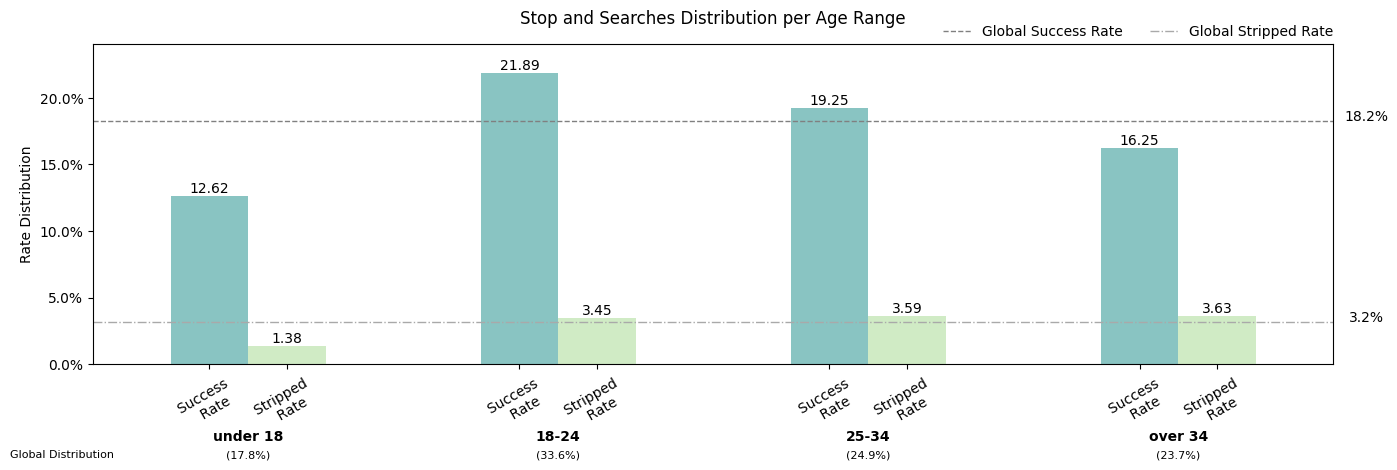

In [76]:
sex = ['Success \n Rate', 'Stripped \n Rate']
labels = ['under 18', '18-24', '25-34', 'over 34']
global_distribution = ['(17.8%)', '(33.6%)', '(24.9%)', '(23.7%)']

ax = df_plot.plot(kind = 'bar', color = color_list, figsize=(14, 5))
ax.set_title('Stop and Searches Distribution per Age Range', pad=15)
sex_pos = np.sort( [p.get_x() + p.get_width()/2  for p in ax.patches])

ax.axhline(y= mean_success, color = 'grey', linewidth = 1, linestyle = '--', label = 'Global Success Rate')
ax.axhline(y= mean_stripped, color = 'darkgrey', linewidth = 1, linestyle = '-.', label = 'Global Stripped Rate')
ax.text(3.605, mean_success, "{}%".format(round(mean_success, 1)) ,ha="center")
ax.text(3.605, mean_stripped, "{}%".format(round(mean_stripped, 1)) ,ha="center")

ax.set_xticks(sex_pos)
ax.set_xticklabels(np.tile(sex, len(labels)), rotation=30)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=None))

ax.legend(['Global Success Rate', 'Global Stripped Rate'], ncol = 2, bbox_to_anchor=(1.01, 1.1), frameon=False)
ax.set_xlabel('') # remove default xlabel
fruit_pos = sex_pos.reshape(-1, len(sex)).mean(axis=1)
trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)

for pos, label, gd in zip(fruit_pos, labels, global_distribution):
    ax.text(pos, -0.25,  label, transform=trans, ha='center', va='bottom', color='black', fontsize=10, weight = 'bold')
    ax.text(pos, -0.3,  gd, transform=trans, ha='center', va='bottom', color='black', fontsize=8)
    
ax.text(-0.6, -0.3,  'Global Distribution', transform=trans, ha='center', va='bottom', color='black', fontsize=8)
ax.set_ylim(0,24)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.25,round(height,2) ,ha="center")
plt.ylabel("Rate Distribution");    

plt.tight_layout()
plt.show()

#### Stripped Searches Distribution By Age Range and Gender

In [77]:
df_clean = df_filter[df_filter['sex'].isin(['Female', 'Male'])]

In [78]:
df_clean.age = pd.Categorical(df_clean.age, 
                      categories=['under 18', '18-24', '25-34', 'over 34'],
                      ordered=True)

/tmp/ipykernel_102/954929065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.age = pd.Categorical(df_clean.age,


In [79]:
df_clean.sex = pd.Categorical(df_clean.sex, 
                      categories=['Female', 'Male'],
                      ordered=True)

/tmp/ipykernel_102/1243096937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.sex = pd.Categorical(df_clean.sex,


In [80]:
df_clean = df_clean.sort_values('age')

In [81]:
df_plot = df_clean.groupby(['age','sex'], dropna=False)['stripped'].agg(['mean']).unstack()*100

In [82]:
global_stripped = df_clean['stripped'].agg(['mean'])['mean']*100

In [83]:
global_stripped

3.161029203693752

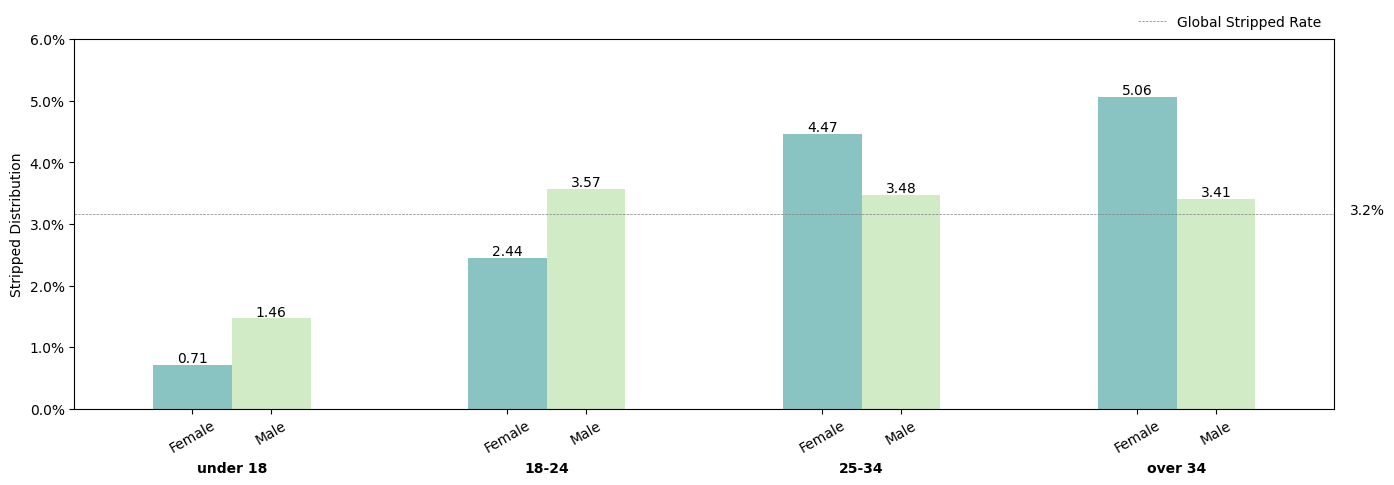

In [84]:
sex = ['Female', 'Male']
labels = ['under 18', '18-24', '25-34', 'over 34']

ax = df_plot.plot(kind = 'bar', color = color_list, figsize=(14, 5))
sex_pos = np.sort( [p.get_x() + p.get_width()/2  for p in ax.patches])
ax.axhline(y= global_stripped, color = 'grey', linewidth = 0.5, linestyle = '--')

ax.set_xticks(sex_pos)
ax.set_xticklabels(np.tile(sex, len(labels)), rotation=30)

ax.legend(['Global Stripped Rate'], ncol = 3, bbox_to_anchor=(1, 1.1), frameon=False)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=None))

#ax.get_legend().remove()
ax.set_xlabel('') # remove default xlabel
fruit_pos = sex_pos.reshape(-1, len(sex)).mean(axis=1)
trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)

for pos, label in zip(fruit_pos, labels):
    ax.text(pos, -0.18,  label, transform=trans, ha='center', va='bottom', color='black', fontsize=10, weight = 'bold')
#for pos in (fruit_pos[:-1] + fruit_pos[1:]) / 2:
#    ax.axvline(pos, 0, -0.18, color='gray', ls='--' , clip_on=False)
ax.set_ylim(0,6)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.04,round(height,2) ,ha="center")
plt.ylabel("Stripped Distribution");    

ax.text(3.605, mean_stripped, "{}%".format(round(mean_stripped, 1)) ,ha="center")

plt.tight_layout()
plt.show()

#### Female Stripped Rate per Age and Ethnicity

In [85]:
df_plot = df_filter[df_filter['sex'] == 'Female'].groupby(['age','officer_ethnicity'], dropna=False)['stripped'].agg(['mean']).unstack()*100

In [86]:
global_stripped = df_filter['stripped'].agg(['mean'])['mean']*100

In [87]:
global_stripped

3.1607318716632977

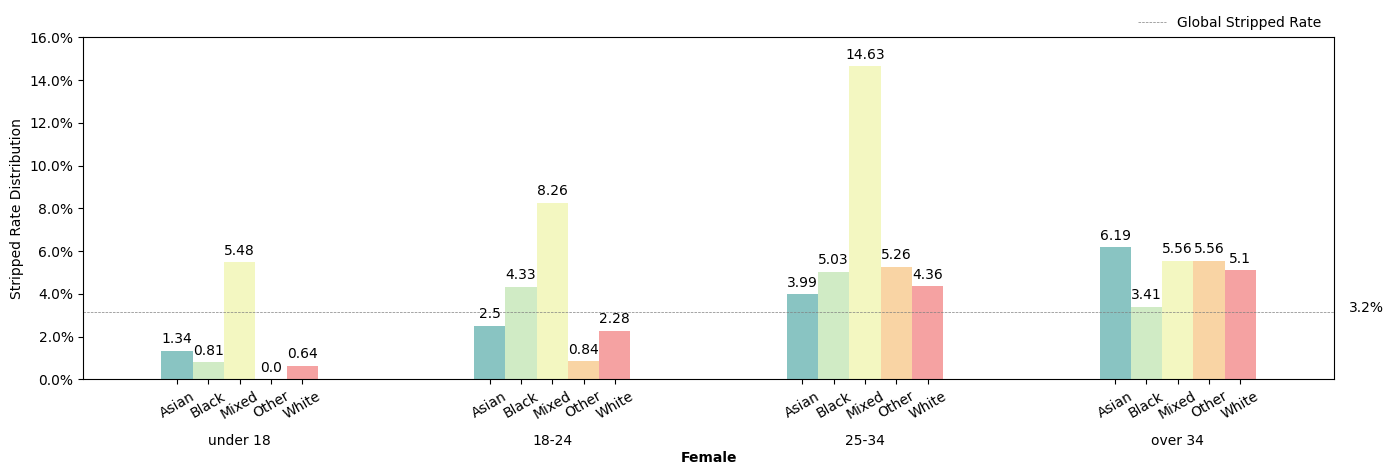

In [88]:
sex = ['Asian', 'Black', 'Mixed', 'Other', 'White']
labels = ['under 18', '18-24', '25-34', 'over 34']

ax = df_plot.plot(kind = 'bar', color = color_list, figsize=(14, 5))
sex_pos = np.sort( [p.get_x() + p.get_width()/2  for p in ax.patches])
ax.axhline(y= global_stripped, color = 'grey', linewidth = 0.5, linestyle = '--')

ax.set_xticks(sex_pos)
ax.set_xticklabels(np.tile(sex, len(labels)), rotation=30)

ax.legend(['Global Stripped Rate'], ncol = 3, bbox_to_anchor=(1, 1.1), frameon=False)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=None))

#ax.get_legend().remove()
ax.set_xlabel('') # remove default xlabel
fruit_pos = sex_pos.reshape(-1, len(sex)).mean(axis=1)
trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)

for pos, label in zip(fruit_pos, labels):
    ax.text(pos, -0.2,  label, transform=trans, ha='center', va='bottom', color='black', fontsize=10)
#for pos in (fruit_pos[:-1] + fruit_pos[1:]) / 2:
#    ax.axvline(pos, 0, -0.18, color='gray', ls='--' , clip_on=False)

ax.text(1.5, -0.25, 'Female', transform=trans, ha='center', va='bottom', color='black', fontsize=10, fontweight = 'bold')
ax.set_ylim(0,16)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.35,round(height,2) ,ha="center")
plt.ylabel("Stripped Rate Distribution");    
ax.text(3.605, mean_stripped, "{}%".format(round(mean_stripped, 1)) ,ha="center")

plt.tight_layout()
plt.show()

#### Male Stripped Rate per Age and Ethnicity

In [89]:
df_plot = df_filter[df_filter['sex'] == 'Male'].groupby(['age','officer_ethnicity'], dropna=False)['stripped'].agg(['mean']).unstack()*100

In [90]:
global_stripped = df_filter['stripped'].agg(['mean'])['mean']*100

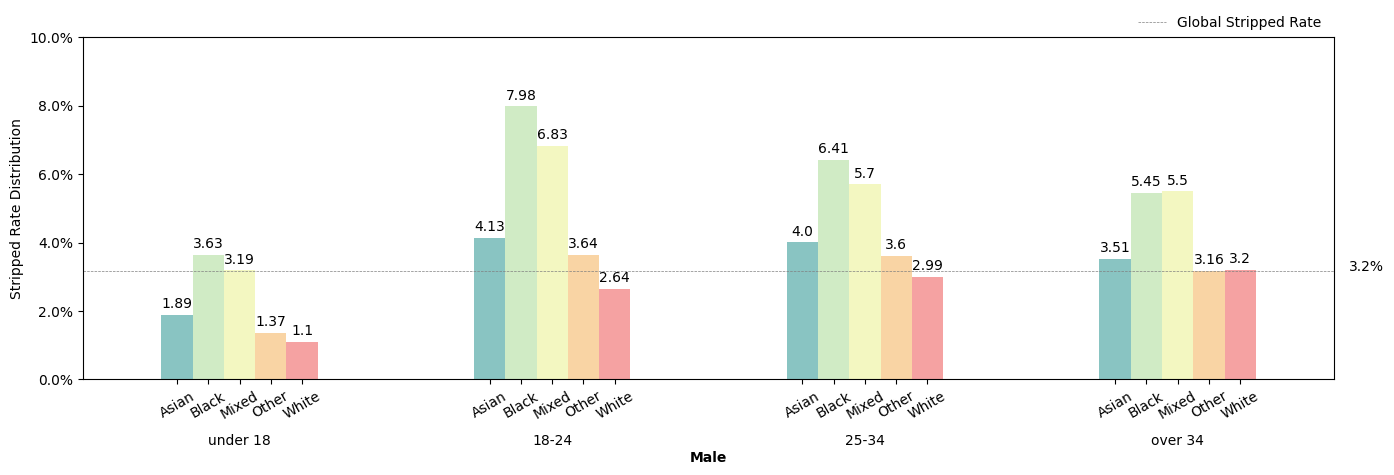

In [91]:
sex = ['Asian', 'Black', 'Mixed', 'Other', 'White']
labels = ['under 18', '18-24', '25-34', 'over 34']

ax = df_plot.plot(kind = 'bar', color = color_list, figsize=(14, 5))
sex_pos = np.sort( [p.get_x() + p.get_width()/2  for p in ax.patches])
ax.axhline(y= global_stripped, color = 'grey', linewidth = 0.5, linestyle = '--')

ax.set_xticks(sex_pos)
ax.set_xticklabels(np.tile(sex, len(labels)), rotation=30)

ax.legend(['Global Stripped Rate'], ncol = 3, bbox_to_anchor=(1, 1.1), frameon=False)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=None))
#ax.get_legend().remove()
ax.set_xlabel('') # remove default xlabel
fruit_pos = sex_pos.reshape(-1, len(sex)).mean(axis=1)
trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)

for pos, label in zip(fruit_pos, labels):
    ax.text(pos, -0.2,  label, transform=trans, ha='center', va='bottom', color='black', fontsize=10)

ax.text(1.5, -0.25, 'Male', transform=trans, ha='center', va='bottom', color='black', fontsize=10, fontweight = 'bold')
ax.text(3.605, mean_stripped, "{}%".format(round(mean_stripped, 1)) ,ha="center")

ax.set_ylim(0,10)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.2,round(height,2) ,ha="center")
plt.ylabel("Stripped Rate Distribution");    

plt.tight_layout()
plt.show()

#### Mean Success Distribution Per Station and Gender

In [92]:
df_gender = df_filter[df_filter['sex'].isin(['Female', 'Male'])]

In [93]:
df_gender.sex = pd.Categorical(df_gender.sex, 
                      categories=['Female', 'Male'],
                      ordered=True)

/tmp/ipykernel_102/1528717998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gender.sex = pd.Categorical(df_gender.sex,


In [94]:
df_gender.station = pd.Categorical(df_gender.station, 
                      categories=['avon-and-somerset',
                                  'bedfordshire', 'btp', 
                                  'cambridgeshire','cheshire', 'city-of-london','cleveland','cumbria',
                                  'derbyshire','devon-and-cornwall','dorset','durham','dyfed-powys', 
                                  'essex',
                                  'gloucestershire',
                                  'hampshire','hertfordshire', 'kent', 
                                  'lincolnshire','merseyside','norfolk',
                                  'north-wales', 'north-yorkshire','northamptonshire', 'northumbria', 'nottinghamshire',
                                  'south-yorkshire','staffordshire','suffolk', 'surrey', 'sussex',
                                  'thames-valley',
                                  'warwickshire','west-mercia', 'west-midlands',  'west-yorkshire',  'wiltshire'],
                      ordered=False)

/tmp/ipykernel_102/1967667663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gender.station = pd.Categorical(df_gender.station,


In [95]:
df_plot = df_gender.groupby(['station','sex'], dropna=False)['target'].agg(['mean']).unstack()*100

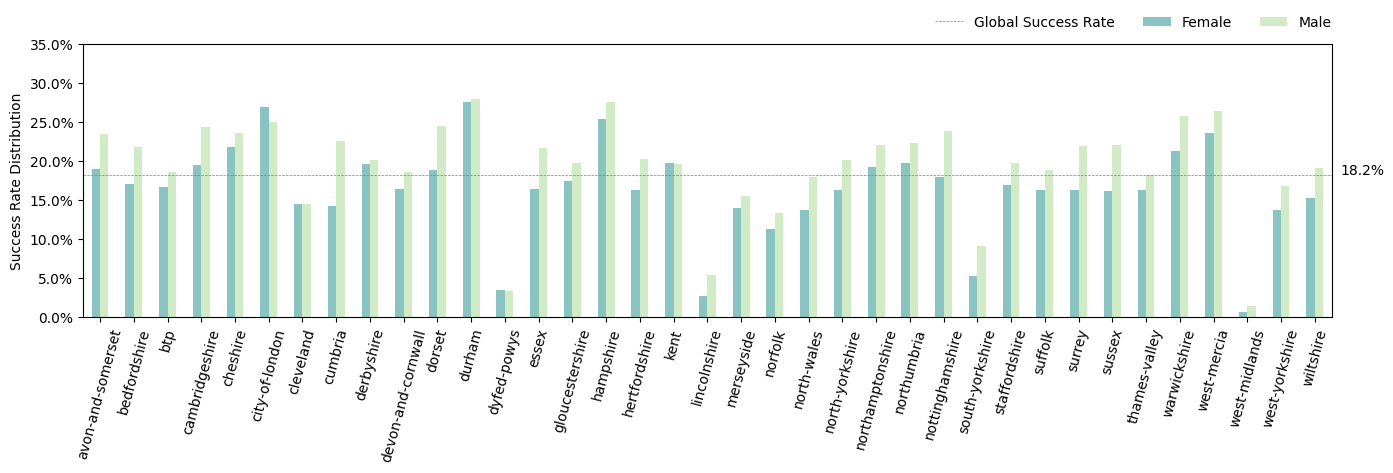

In [96]:
sex = ['Asian', 'Black', 'Mixed', 'Other', 'White']
labels = ['under 18', '18-24', '25-34', 'over 34']

ax = df_plot.plot(kind = 'bar', color = color_list, figsize=(14, 5))
sex_pos = np.sort( [p.get_x() + p.get_width()/2  for p in ax.patches])
ax.axhline(y= mean_success, color = 'grey', linewidth = 0.5, linestyle = '--')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=None))
ax.tick_params(axis='x', labelrotation = 75)
ax.legend(['Global Success Rate', 'Female', 'Male'], ncol = 3, bbox_to_anchor=(1.01, 1.15), frameon=False)
ax.set_xlabel('') # remove default xlabel
trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.text(37.4, mean_success, "{}%".format(round(mean_success, 1)) ,ha="center")

ax.set_ylim(0,35)

plt.ylabel("Success Rate Distribution");    

plt.tight_layout()
plt.show()

#### Mean Success Distribution Per Station and Ethnicity

In [97]:
df_ethnicity = df_filter

In [98]:
df_ethnicity.station = pd.Categorical(df_ethnicity.station, 
                      categories=['avon-and-somerset',
                                  'bedfordshire', 'btp', 
                                  'cambridgeshire','cheshire', 'city-of-london','cleveland','cumbria',
                                  'derbyshire','devon-and-cornwall','dorset','durham','dyfed-powys', 
                                  'essex',
                                  'gloucestershire',
                                  'hampshire','hertfordshire', 'kent', 
                                  'lincolnshire','merseyside','norfolk',
                                  'north-wales', 'north-yorkshire','northamptonshire', 'northumbria', 'nottinghamshire',
                                  'south-yorkshire','staffordshire','suffolk', 'surrey', 'sussex',
                                  'thames-valley',
                                  'warwickshire','west-mercia', 'west-midlands',  'west-yorkshire',  'wiltshire'],
                      ordered=False)

In [99]:
df_plot = df_ethnicity.groupby(['station','officer_ethnicity'], dropna=False)['target'].agg(['mean']).unstack()*100

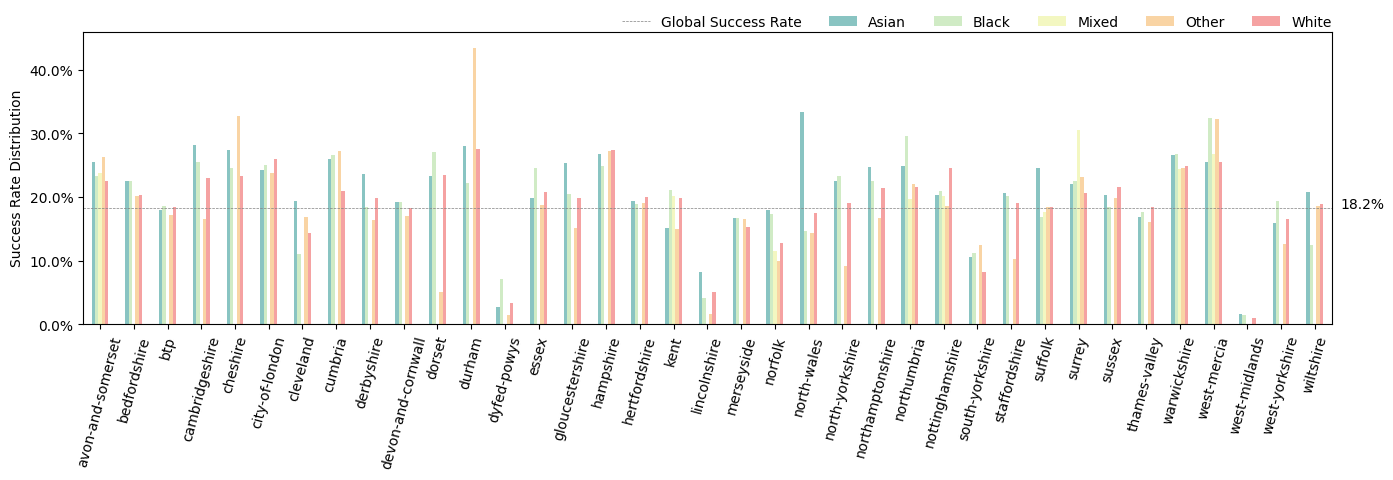

In [100]:
sex = ['Asian', 'Black', 'Mixed', 'Other', 'White']
labels = ['under 18', '18-24', '25-34', 'over 34']

ax = df_plot.plot(kind = 'bar', color = color_list, figsize=(14, 5))
sex_pos = np.sort( [p.get_x() + p.get_width()/2  for p in ax.patches])
ax.axhline(y= mean_success, color = 'grey', linewidth = 0.5, linestyle = '--')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=None))
ax.tick_params(axis='x', labelrotation = 75)
ax.legend(['Global Success Rate', 'Asian', 'Black', 'Mixed', 'Other', 'White'], ncol = 6, bbox_to_anchor=(1.01, 1.1), frameon=False)
ax.set_xlabel('') # remove default xlabel
trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.text(37.4, mean_success, "{}%".format(round(mean_success, 1)) ,ha="center")
ax.set_ylim(0,46)

plt.ylabel("Success Rate Distribution");    

plt.tight_layout()
plt.show()

#### Mean Success Distribution Per Station and Ethnicity

In [101]:
df_ethnicity = df_filter

In [102]:
df_ethnicity.station = pd.Categorical(df_ethnicity.station, 
                      categories=['avon-and-somerset',
                                  'bedfordshire', 'btp', 
                                  'cambridgeshire','cheshire', 'city-of-london','cleveland','cumbria',
                                  'derbyshire','devon-and-cornwall','dorset','durham','dyfed-powys', 
                                  'essex',
                                  'gloucestershire',
                                  'hampshire','hertfordshire', 'kent', 
                                  'lincolnshire','merseyside','norfolk',
                                  'north-wales', 'north-yorkshire','northamptonshire', 'northumbria', 'nottinghamshire',
                                  'south-yorkshire','staffordshire','suffolk', 'surrey', 'sussex',
                                  'thames-valley',
                                  'warwickshire','west-mercia', 'west-midlands',  'west-yorkshire',  'wiltshire'],
                      ordered=False)

In [103]:
df_plot = df_ethnicity.groupby(['station','age'], dropna=False)['target'].agg(['mean']).unstack()*100

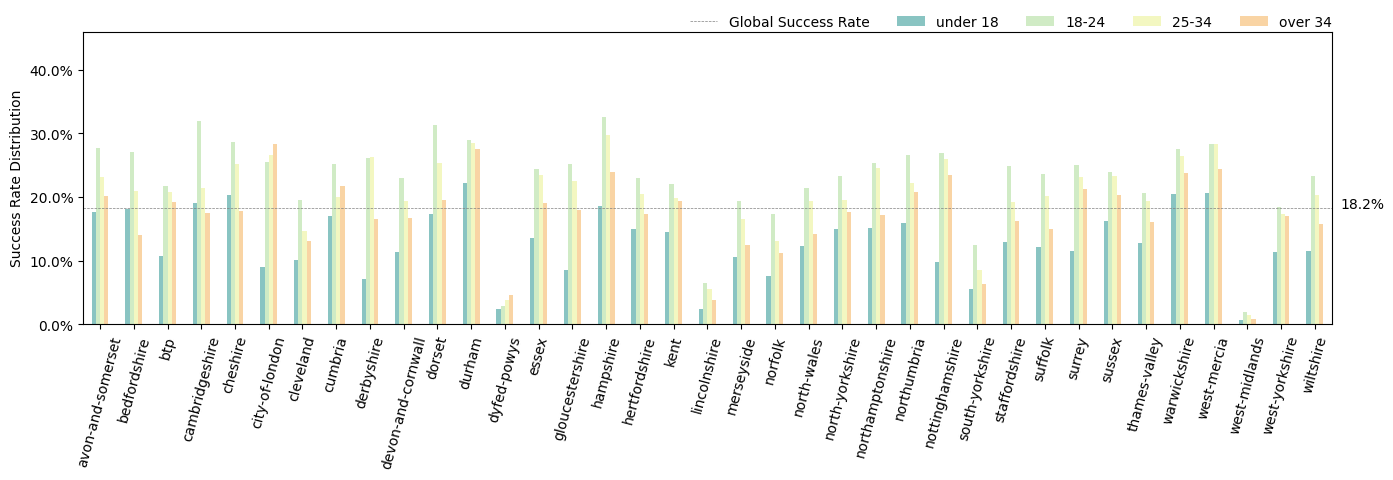

In [104]:
ax = df_plot.plot(kind = 'bar', color = color_list, figsize=(14, 5))
sex_pos = np.sort( [p.get_x() + p.get_width()/2  for p in ax.patches])
ax.axhline(y= mean_success, color = 'grey', linewidth = 0.5, linestyle = '--')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=None))
ax.tick_params(axis='x', labelrotation = 75)
ax.legend(['Global Success Rate', 'under 18', '18-24', '25-34', 'over 34'], ncol = 6, bbox_to_anchor=(1.01, 1.1), frameon=False)
ax.set_xlabel('') # remove default xlabel
trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.text(37.4, mean_success, "{}%".format(round(mean_success, 1)) ,ha="center")
ax.set_ylim(0,46)

plt.ylabel("Success Rate Distribution");    

plt.tight_layout()
plt.show()

#### Total Stop and Searches Distribution per Station

In [105]:
df_plot = df_train.groupby(df_train.station)['sex'].size()

In [106]:
df_target = df_train.groupby(['station'])['target'].agg(['mean'])*100

In [107]:
df_target['toplot'] = df_target.index.tolist()

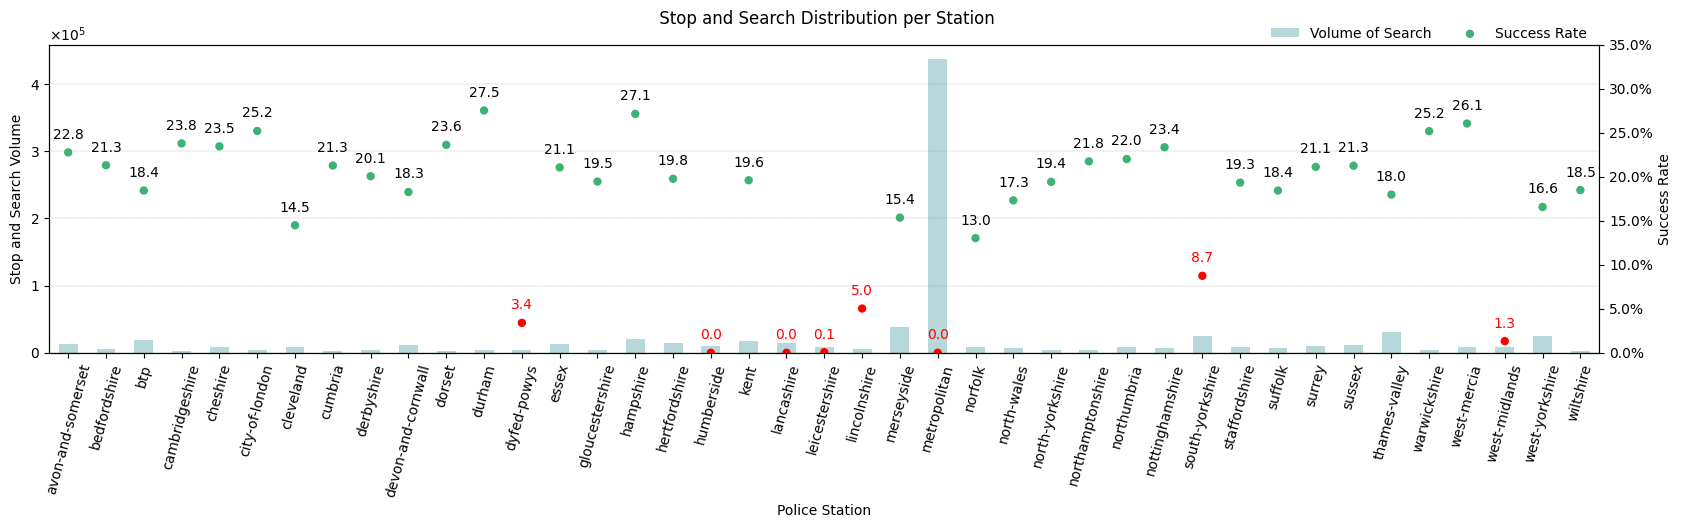

In [108]:
fig, ax1 = plt.subplots(figsize=(20, 4))

#Volume of Searches
ax = df_plot.plot(kind = 'bar',stacked = True, color = '#0e7f85', alpha = 0.3)

ax.tick_params(axis='x', labelrotation = 75)
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText = True)
ax.yaxis.set_major_locator(mtick.MultipleLocator(100000))

ax.legend(['Volume of Search', 'Success Rate'], ncol = 2, bbox_to_anchor=(0.9, 1.1), frameon=False)
ax.set_ylabel('Stop and Search Volume')
ax.set_xlabel('Police Station')
ax.set_title(' Stop and Search Distribution per Station', pad = 15)

ax1 = ax.twinx()  # instantiate a second axes that shares the same x-axis

#Scatter Plot of Success Rate per Station

#Change Size of Point per Value
#sizes = 3*np.sqrt(df_target['mean'].values)
sizes = np.full((df_target.shape[0], 1), 25, dtype=float)
sizes = sizes.astype(float)
rng = np.random.RandomState(0)

ax1 = df_target.plot(kind = 'scatter', x = 'toplot', y = 'mean', ax = ax1, c = ['r' if x else 'mediumseagreen' for x in (df_target['mean'] < 10)], s=sizes)

ax1.set_ylim(0,35)
ax1.set_ylabel('Success Rate')

ax1.legend(['Success Rate'], ncol = 1, bbox_to_anchor=(1, 1.1), frameon=False)

ax1.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=None))

#Create Labels in Scatter Points
y = df_target.index.tolist()
n = [np.round(x,1) for x in df_target['mean'].values]
z = df_target['mean'].values

for i, txt in enumerate(n):
    ax1.annotate(txt, (y[i], z[i] + 2),ha='center', va='center', color = 'r' if txt < 10 else 'black')
ax.grid(axis = 'y', which='major', color='grey', linestyle='--', linewidth=0.2)    
plt.show()

#### Stop and Searches Distribution By Reason

In [109]:
df_plot = df_train.groupby(df_train.object_search)['object_search'].size()/df_train.shape[0]*100

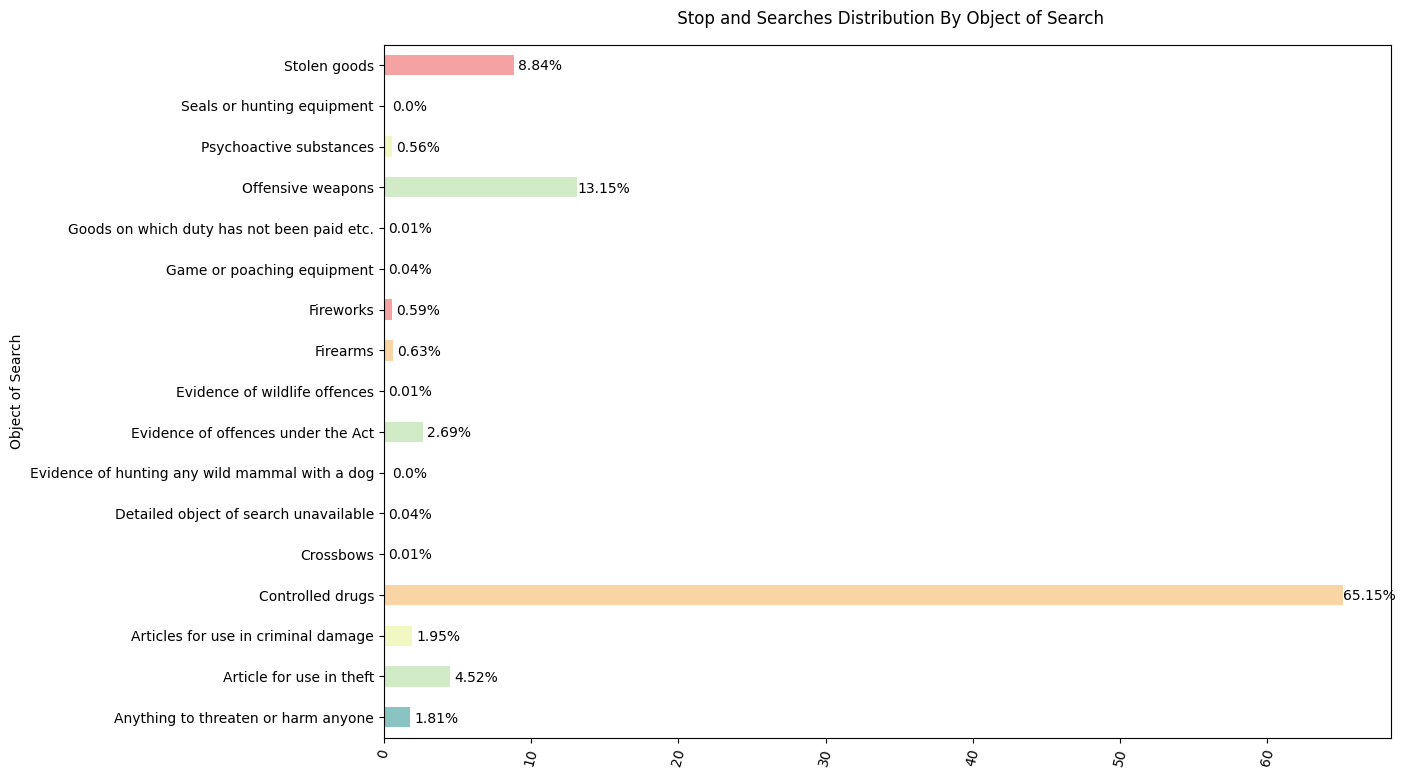

In [110]:
ax = df_plot.plot.barh( stacked = True, color = color_list, figsize=(13, 9))
ax.set_title(' Stop and Searches Distribution By Object of Search', pad=15)
ax.tick_params(axis='x', labelrotation = 75)
ax.set_ylabel('Object of Search')
for p in ax.patches:
    height = p.get_width()
    ax.text(height + 1.76, p.get_y()+ p.get_height()/4., "{}%".format(round(height,2)) ,ha="center")

#### Stop and Searches Distribution By Legislation

In [111]:
df_plot = df_train.groupby(df_train.legislation)['legislation'].size()/df_train.shape[0]*100

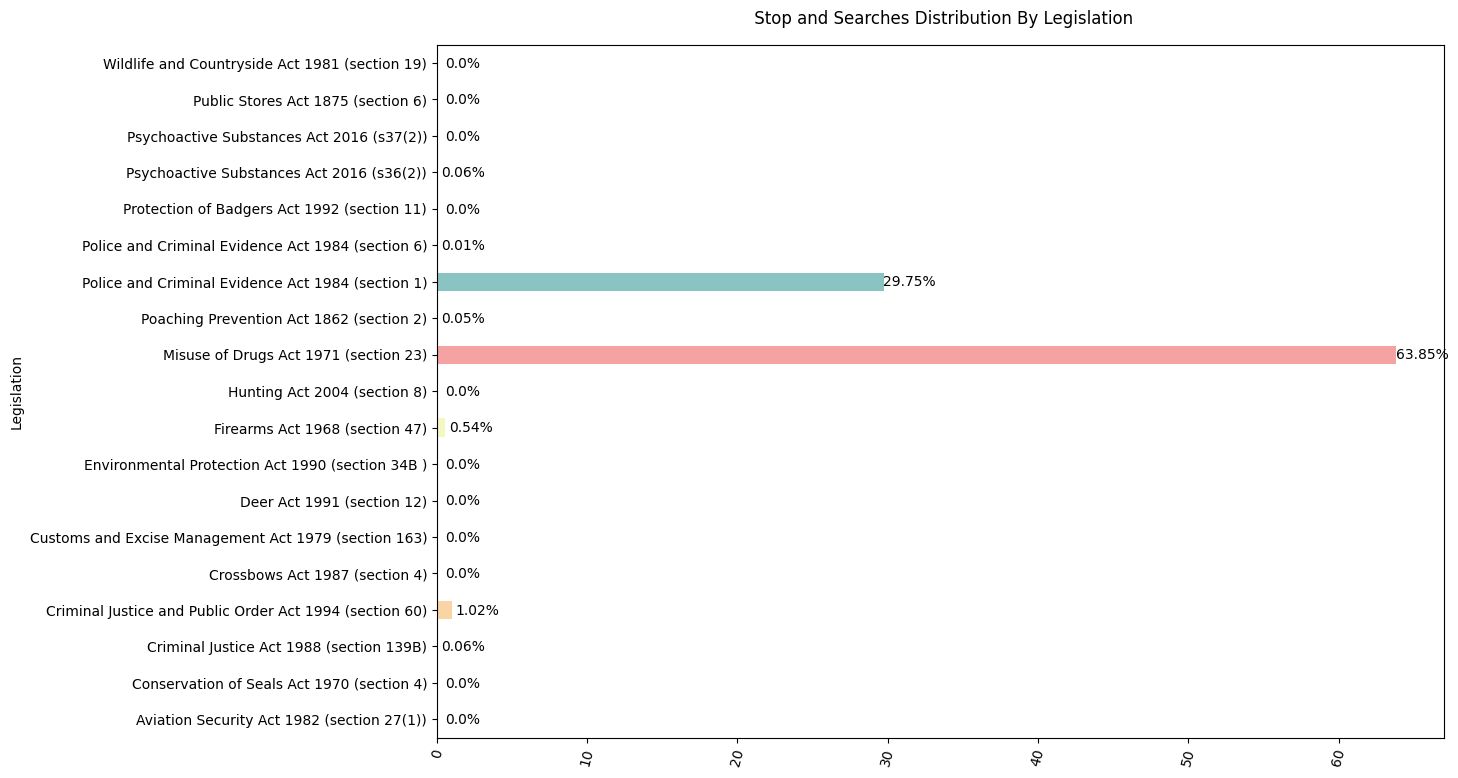

In [112]:
ax = df_plot.plot.barh( stacked = True, color = color_list, figsize=(13, 9))
ax.set_title(' Stop and Searches Distribution By Legislation', pad=15)
ax.tick_params(axis='x', labelrotation = 75)
ax.set_ylabel('Legislation')
for p in ax.patches:
    height = p.get_width()
    ax.text(height + 1.7, p.get_y()+ p.get_height()/4., "{}%".format(round(height,2)), ha="center")

#### Stop and Search Distribution By Outcome

In [113]:
df_plot = (df_train.groupby(df_train.outcome)[['target']].value_counts(dropna = False)).unstack()/df_train.shape[0]*100

In [114]:
df_plot

target,False,True
outcome,,
A no further action disposal,73.250838,0.000000
Arrest,9.441403,3.603974
Caution (simple or conditional),0.116039,0.264414
Community resolution,5.619827,2.351128
Khat or Cannabis warning,0.282159,1.083223
Penalty Notice for Disorder,1.877634,0.144173
Summons / charged by post,1.192842,0.772347


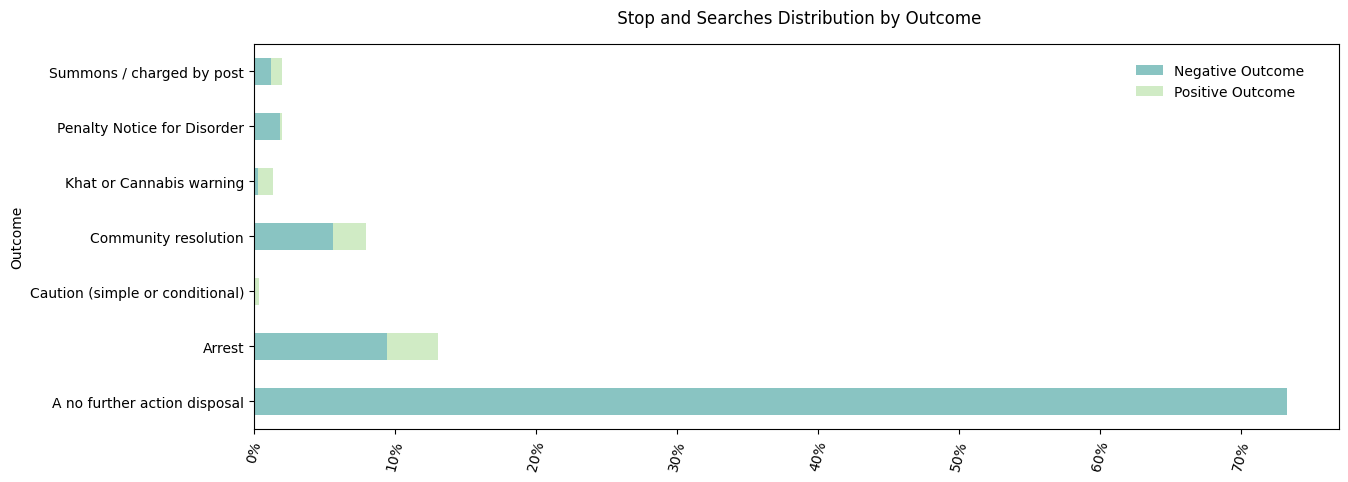

In [115]:
ax = df_plot.plot.barh(stacked = True, color = color_list, figsize=(14, 5))
ax.set_title(' Stop and Searches Distribution by Outcome', pad=15)
ax.tick_params(axis='x', labelrotation = 75)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals=None))
ax.set_ylabel('Outcome')
#ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText = True)
ax.legend(['Negative Outcome', 'Positive Outcome'], ncol = 1, bbox_to_anchor=(0.98, 0.98), frameon=False)

#### Self and Officer Ethinicity

In [116]:
dict_ethnicity = {'Other ethnic group - Not stated': np.nan,
                   'White - Any other White background': 'White',
                   'White - English/Welsh/Scottish/Northern Irish/British': 'White',
                   'Mixed/Multiple ethnic groups - White and Black African': 'Mixed',
                   'Black/African/Caribbean/Black British - Any other Black/African/Caribbean background': 'Black',
                   'Black/African/Caribbean/Black British - Caribbean': 'Black',
                   'Asian/Asian British - Any other Asian background': 'Asian',
                   'Asian/Asian British - Indian': 'Asian',
                   'Asian/Asian British - Bangladeshi': 'Asian',
                   'Black/African/Caribbean/Black British - African': 'Black',
                   'White - Irish': 'White',
                   'Other ethnic group - Any other ethnic group': 'Other',
                   'Mixed/Multiple ethnic groups - White and Asian': 'Mixed',
                   'Asian/Asian British - Chinese': 'Asian',
                   'Mixed/Multiple ethnic groups - Any other Mixed/Multiple ethnic background': 'Mixed',
                   'Mixed/Multiple ethnic groups - White and Black Caribbean': 'Mixed',
                   'Asian/Asian British - Pakistani': 'Asian',
                   'White - Gypsy or Irish Traveller': 'White',
                   'nan': np.nan,
                   'Other ethnic group - Arab': 'Other'}

In [117]:
df_ethn = df_train.copy()

In [118]:
df_ethn['mapped']= df_train.self_ethnicity.apply(lambda x: dict_ethnicity[x]).astype(str)

Text(50.722222222222214, 0.5, 'Self-defined Ethnicity')

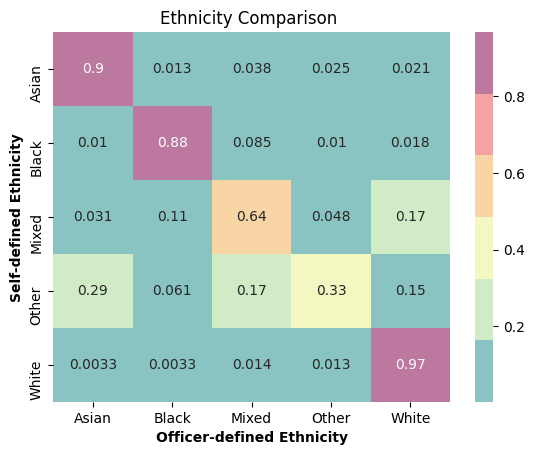

In [119]:
labels_ethnicity = ['Asian', 'Black', 'Mixed', 'Other', 'White']
sns.heatmap(pd.DataFrame(confusion_matrix(df_train['officer_ethnicity'], 
                             df_ethn['mapped'], 
                             labels = labels_ethnicity, 
                             normalize = 'true'), 
                         index = labels_ethnicity, 
                         columns = labels_ethnicity).round(5), 
            annot = True,
            cmap = ListedColormap(color_list))
plt.title('Ethnicity Comparison ')
plt.xlabel('Officer-defined Ethnicity', weight='bold')
plt.ylabel('Self-defined Ethnicity', weight='bold')

#### Check Inbalanced Dataset

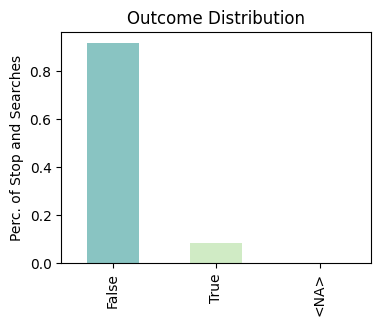

In [120]:
# Checking if the dataset is imbalanced 
df_train["target"].value_counts(normalize=True, dropna = False).plot(kind="bar", color = color_list, figsize=(4, 3))
plt.title("Outcome Distribution")
plt.ylabel("Perc. of Stop and Searches");

#### Success Rate & Outcome

In [121]:
df_plot = (df_train.groupby(df_train.positive_outcome)[['linked_search']].value_counts(dropna = False))#.unstack()

In [122]:
df_poutcome = (df_train.groupby(df_train.positive_outcome)).size()

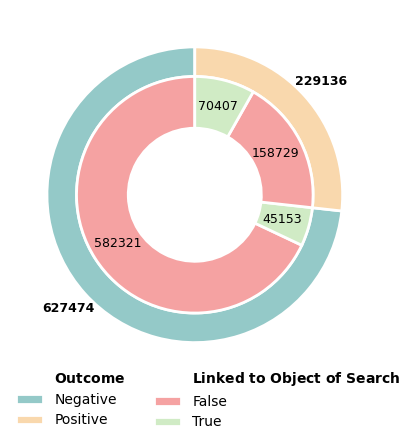

In [123]:
fig, ax = plt.subplots()

size = 0.3

#cmap = plt.get_cmap("RdYlGn")
cmap = ListedColormap(color_list)
outer_colors = cmap(np.array([0, 3]), alpha = 0.9)
inner_colors = cmap(np.array([4, 1, 4, 1]), alpha = 1)

labels_inner = ["92.8%", 
                "7.2%",
                "69.3%",
                "30.7%"]

ax.pie([0], 
       normalize = False, 
       wedgeprops=dict(color = 'white', alpha = 0, linewidth = 0),
       startangle = 0,
       textprops={'fontsize': 0, 'weight': 'bold'})

ax.pie(df_poutcome, 
       radius=1, 
       colors=outer_colors,
       wedgeprops=dict(width=0.2, edgecolor='w', linewidth= 2 ), 
       autopct=lambda x: '{:.0f}'.format(x*df_poutcome.sum()/100),
       pctdistance=1.15,
       startangle=90, explode = (0.0, 0.0), textprops={'fontsize': 9, 'weight': 'bold'}
      )

ax.pie([0], 
       normalize = False, 
       wedgeprops=dict(color = 'white', alpha = 0), 
       startangle = 0,
       textprops={'fontsize': 9})

ax.pie(df_plot, 
       radius=0.8,
       colors=inner_colors,
       wedgeprops=dict(width=0.35, edgecolor='w',linewidth= 2), 
       startangle=90,
       explode = (0, 0, 0, 0), 
       autopct=lambda x: '{:.0f}'.format(x*df_poutcome.sum()/100),
       pctdistance=0.77,
       textprops={'fontsize': 9}
       #labels = labels_inner, 
       #labeldistance = 0.575, rotatelabels = True, textprops={'fontsize': 8.5},
       )
plt.legend([r'$\bf{Outcome}$'] + ['Negative', 'Positive'] + [r'$\bf{Linked\ to\ Object\ of\ Search}$'] + ['False', 'True'], 
           ncol =2, 
           loc=(0, -0.15), 
           frameon = False)

plt.show()